In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import time

In [38]:
def show_six(imgs, gray = True):
    fig, axes = plt.subplots(2, 3, figsize = (20, 8))
    fig.tight_layout()
    for i in range(len(imgs)):
        if gray:
            axes[i //3, i %3].imshow(imgs[i], "gray")
        else:
            axes[i //3, i %3].imshow(imgs[i])

        axes[i //3, i %3].set_xticks([])
        axes[i //3, i %3].set_yticks([])

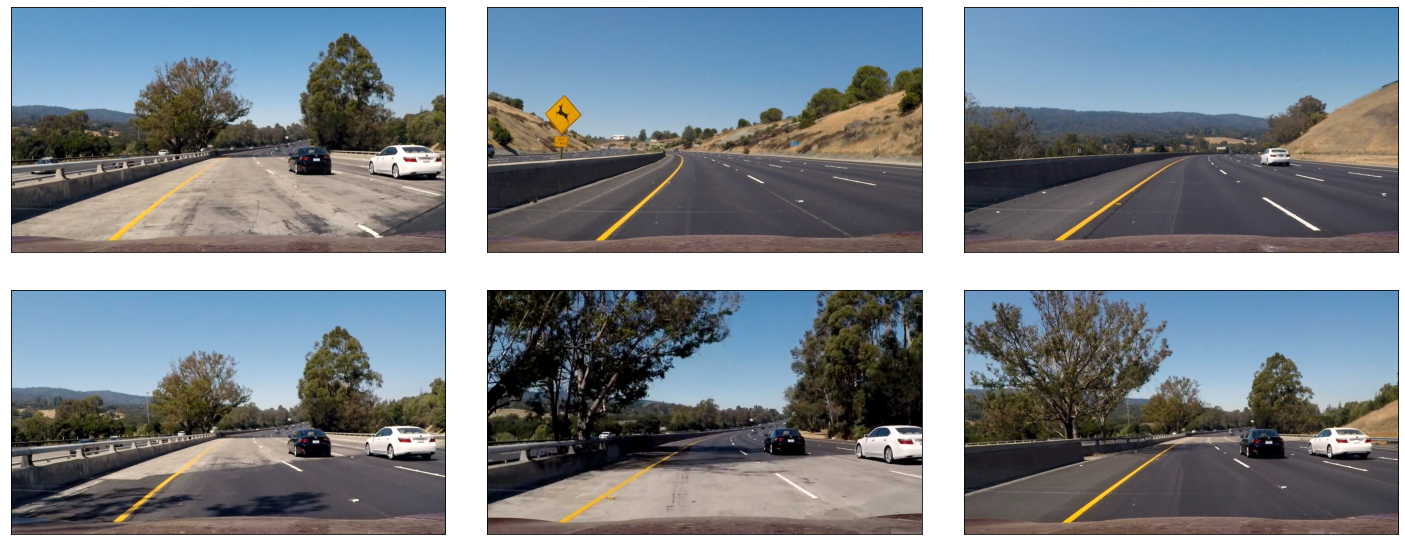

In [39]:
imgs = [plt.imread(f"Project_data/test_images/test{i}.jpg", 0) for i in range(1, 7)]
show_six(imgs, 0)



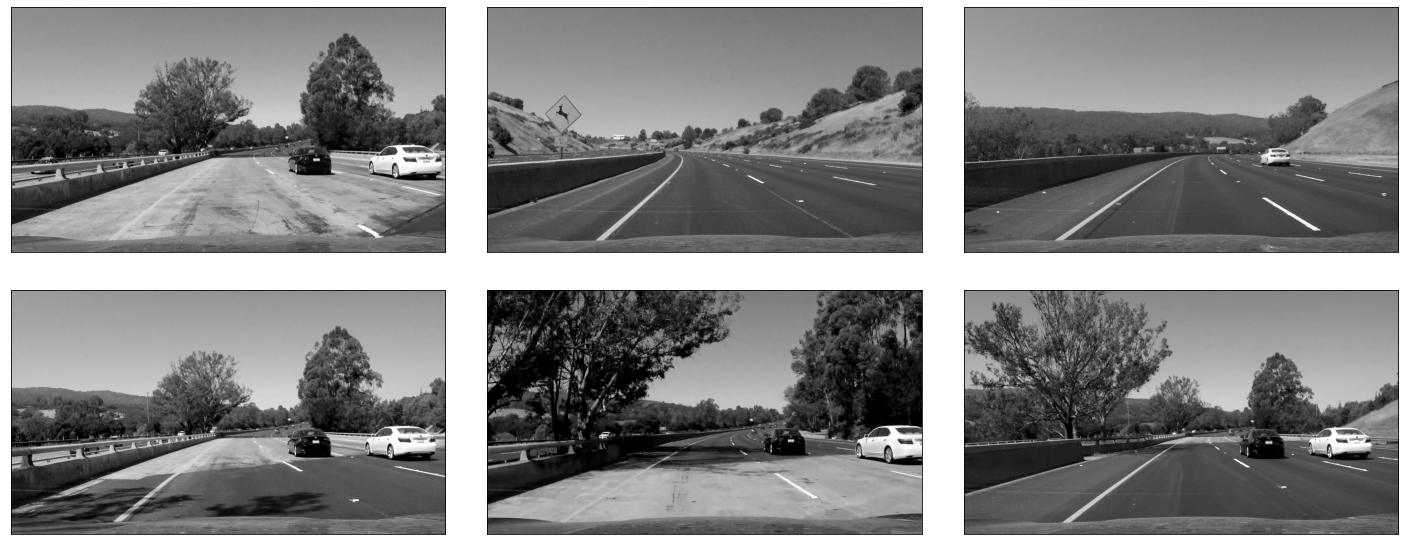

In [40]:
grays = [cv.cvtColor(img, cv.COLOR_RGB2GRAY) for img in imgs]
show_six(grays)

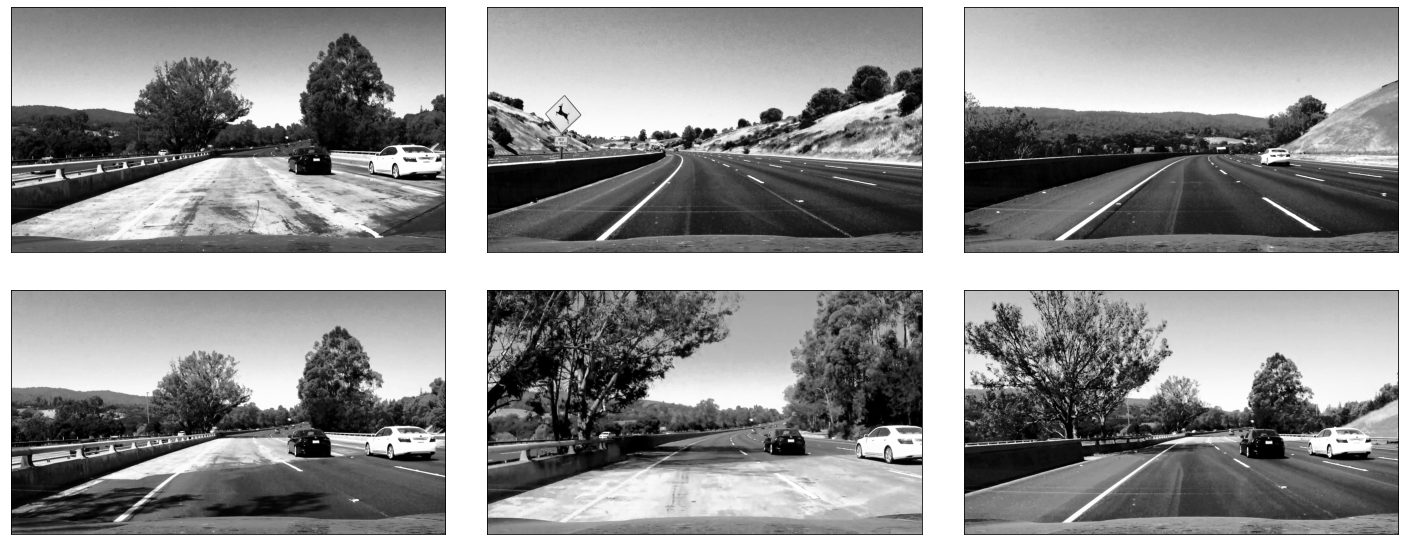

In [41]:
# Histogram equalization
eqs = [cv.equalizeHist(gray) for gray in grays]
show_six(eqs)

# Thresholding

In [42]:
def gaussian_blur(img, ksize):
    return cv.GaussianBlur(img, (ksize, ksize), 0)

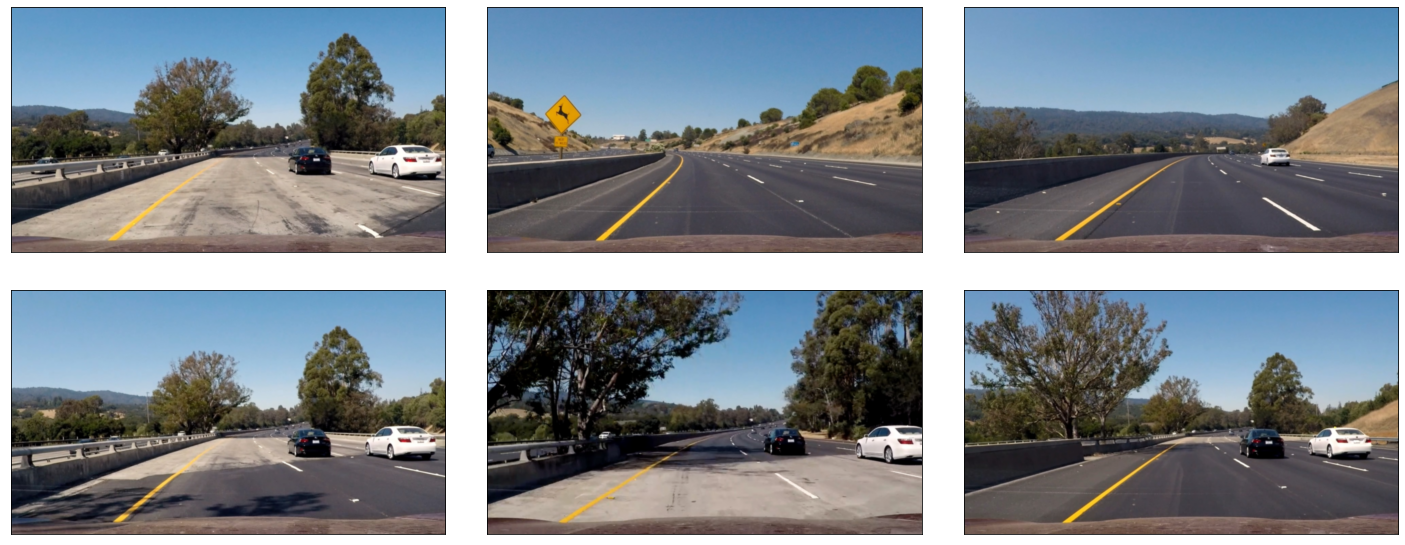

In [43]:
gaussians = [gaussian_blur(img, 5) for img in imgs]
show_six(gaussians)

In [2]:
def S_thresholder(S, thresh=(0, 255)):

    S_threshold = S * 0
    S_threshold[(S >= thresh[0]) & (S <= thresh[1])] = 1
    
    return S_threshold

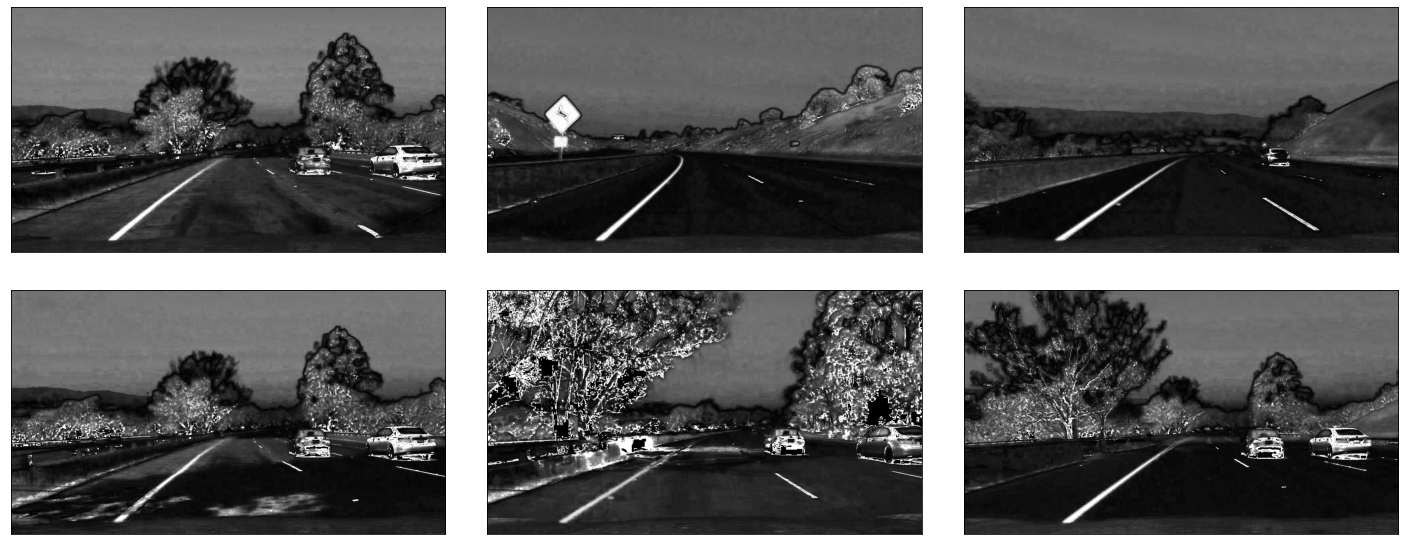

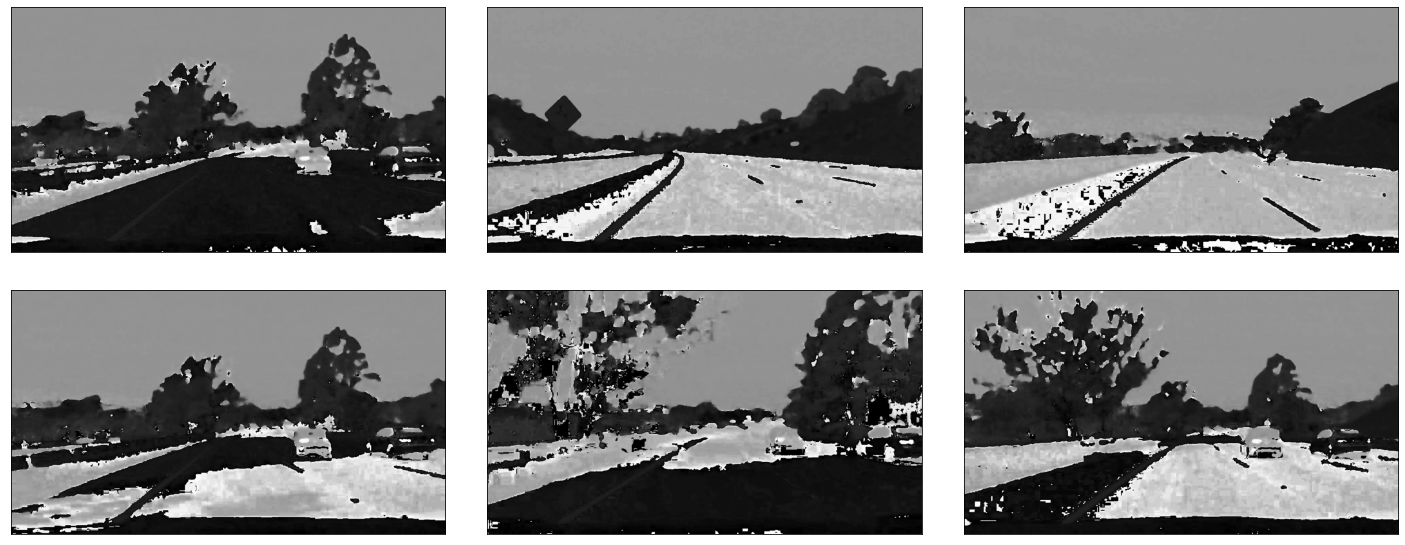

In [45]:
HLSs = [cv.cvtColor(img, cv.COLOR_RGB2HLS) for img in imgs]

Ss = [HLS[:,:,2] for HLS in HLSs]
show_six(Ss)
Hs = [HLS[:,:,0] for HLS in HLSs]
show_six(Hs)

Comment: H_channel is very bad, while the S Channel is good

In [46]:
# Sthresholds = [S_thresholder(S, (70, 255)) for S in Ss]
# show_six(Sthresholds)

# Sthresholds = [S_thresholder(S, (100, 255)) for S in Ss]
# show_six(Sthresholds)

# Sthresholds = [S_thresholder(S, (130, 255)) for S in Ss]
# show_six(Sthresholds)

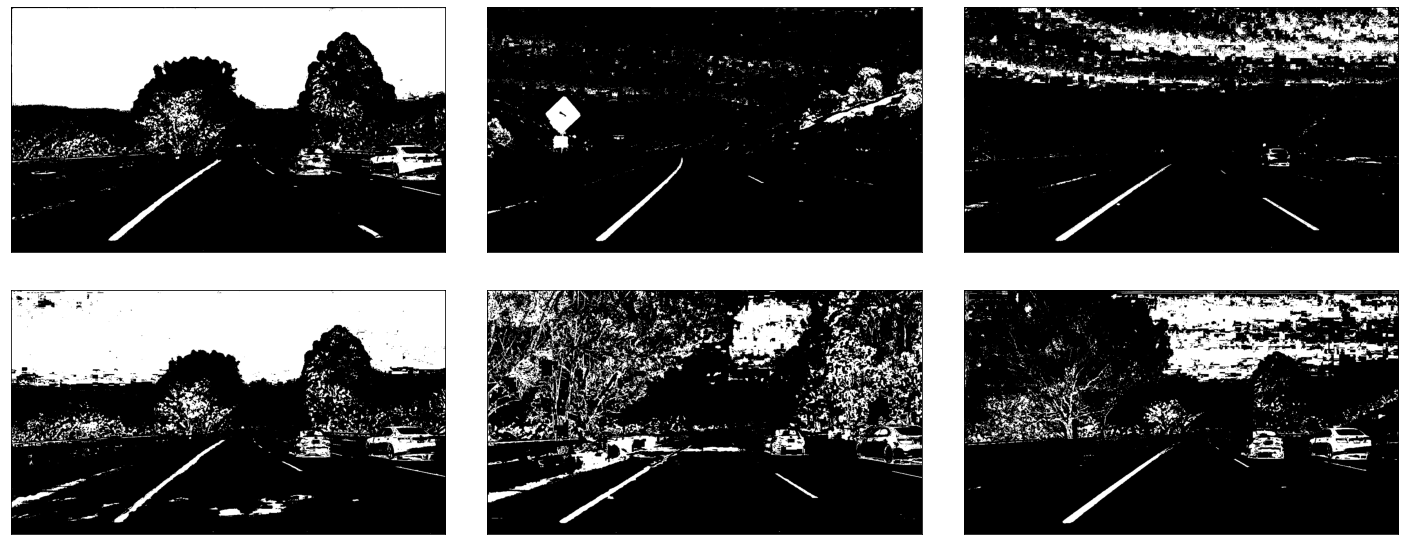

In [69]:
Sthresholds = [S_thresholder(S, (110, 255)) for S in Ss]
show_six(Sthresholds)

In [3]:
def abs_sobel_thresh(img, orient = 'x', sobel_kernel = 3, thresh = (0,255)):
    if orient == "x":
        sobel = cv.Sobel(img, cv.CV_64F, 1, 0, ksize = sobel_kernel)
    elif orient == "y":
        sobel = cv.Sobel(img, cv.CV_64F, 0, 1, ksize = sobel_kernel)


    abs_sobel = np.abs(sobel)

    scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))


    sbinary = scaled_sobel * 0
    sbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel < thresh[1])] = 1

    return sbinary

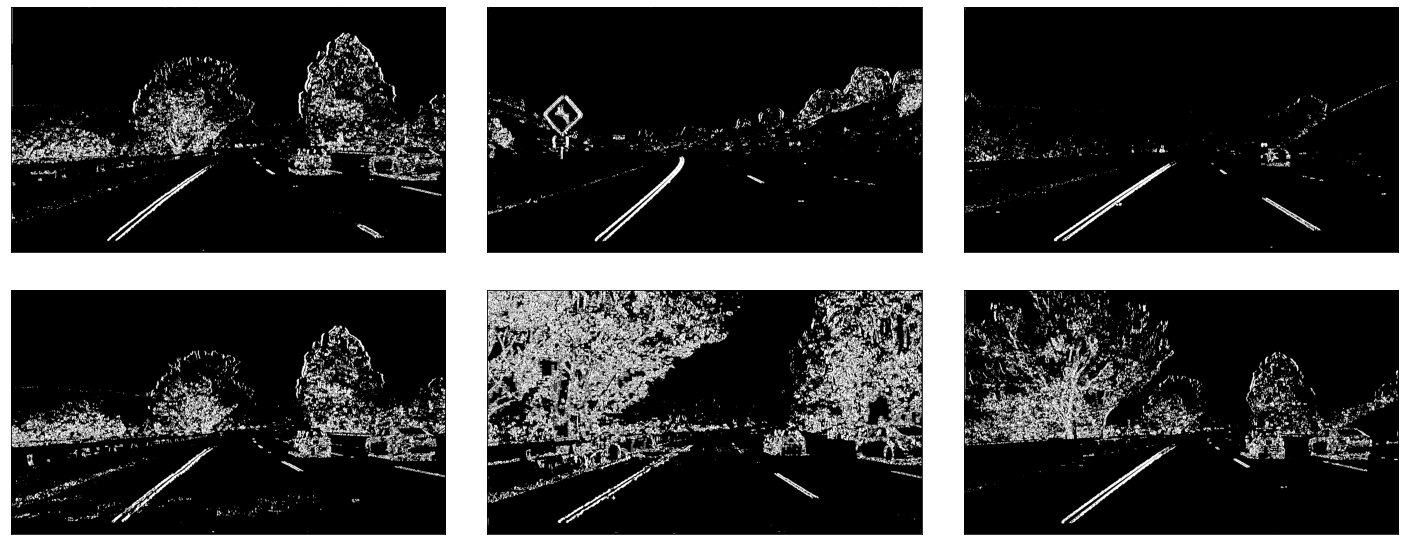

In [71]:
# sobelxs = [abs_sobel_thresh(gray, "x", 1, (35, 100)) for gray in grays]
# show_six(sobelxs)
sobelxs = [abs_sobel_thresh(S, "x", 5, (20, 150)) for S in Ss]
show_six(sobelxs)

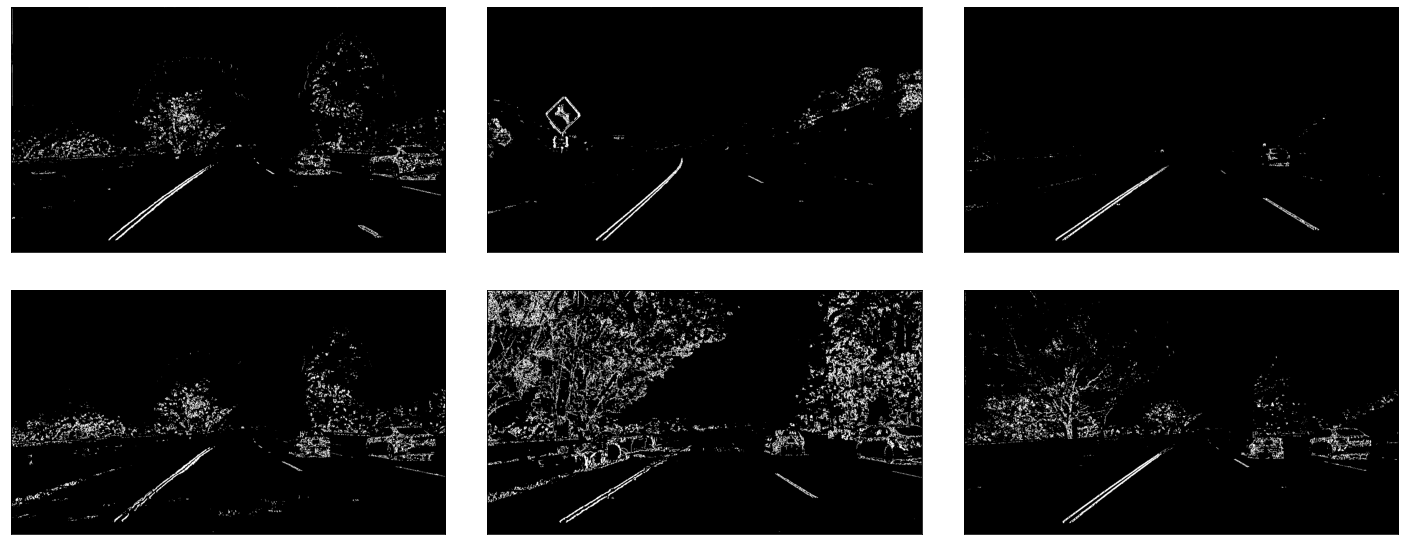

In [74]:
# Combining S_thresh and sobelx
binary_sobx_Sthreshs = [gray * 0 for gray in grays]
for i in range(6):
    binary_sobx_Sthreshs[i][(Sthresholds[i] == 1) & (sobelxs[i] == 1)] = 1

show_six(binary_sobx_Sthreshs)


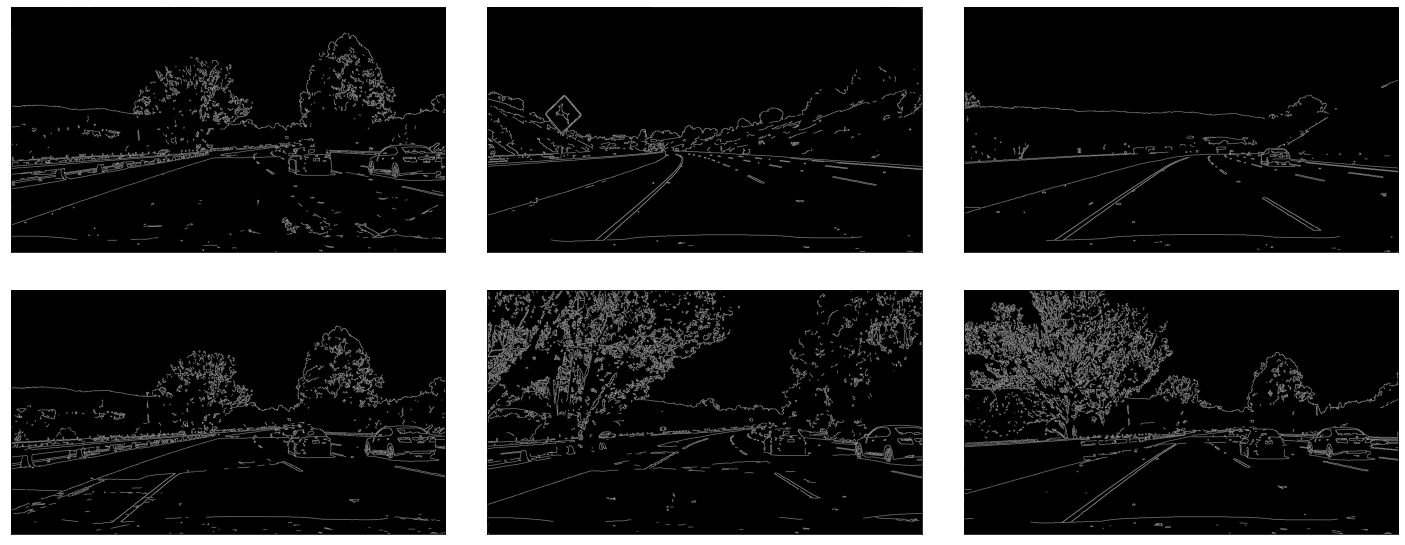

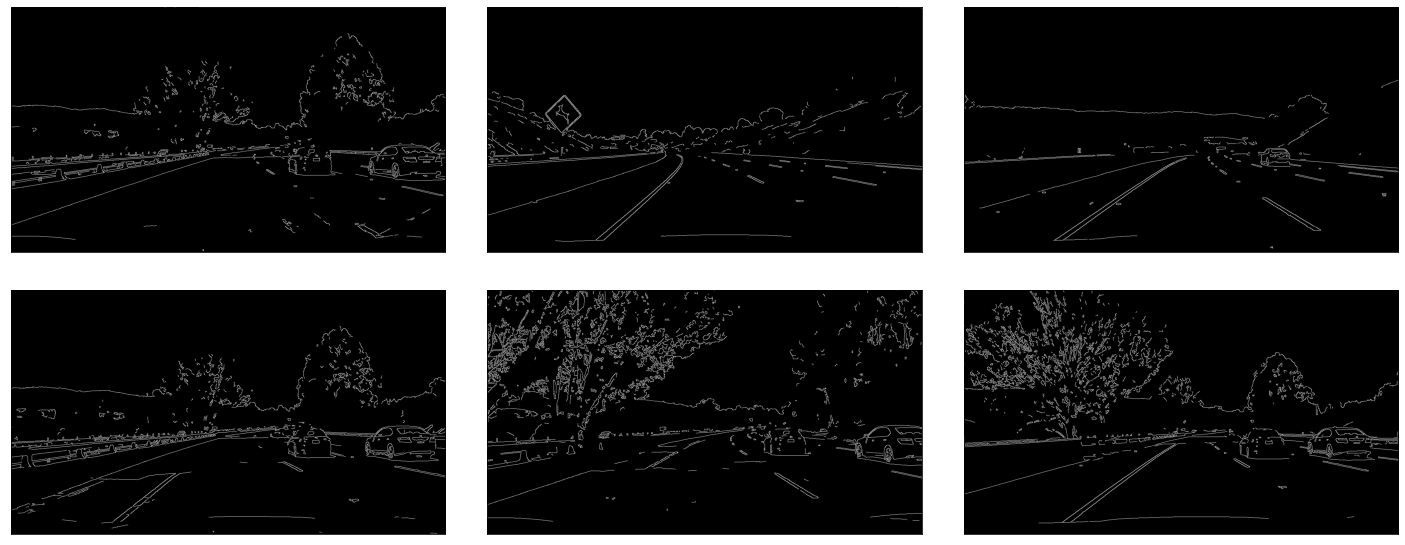

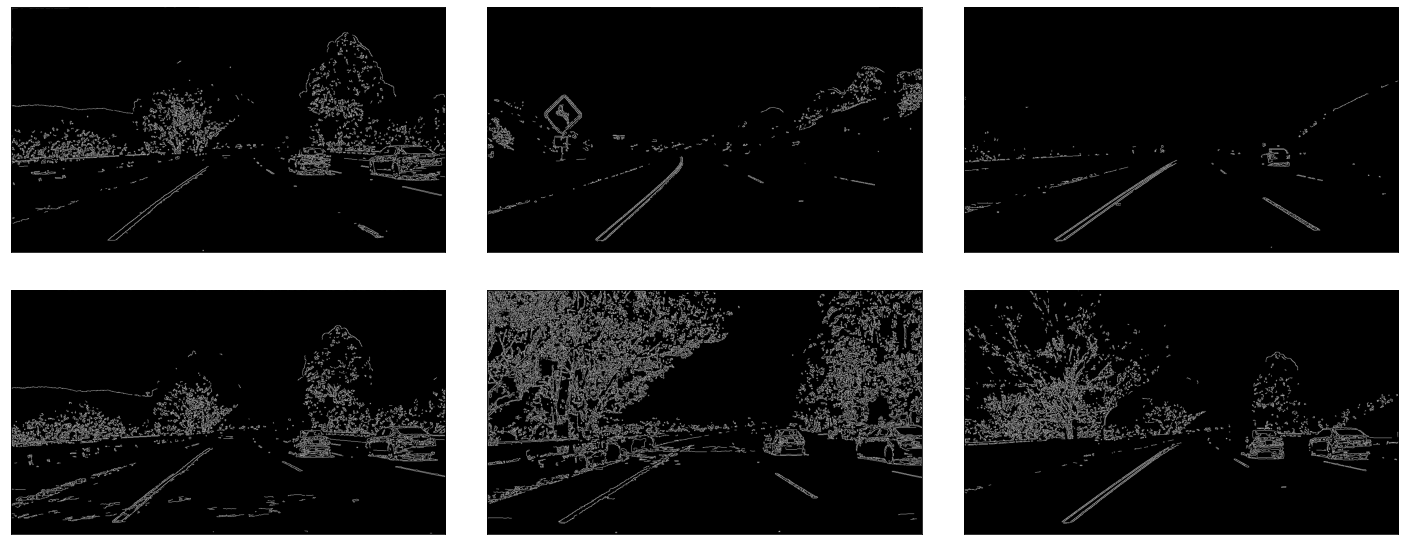

In [ ]:
gaussians = [gaussian_blur(gray, 3) for gray in grays]

cannys = [cv.Canny(gray, 150, 255) for gray in grays]
show_six(cannys)
cannys = [cv.Canny(gaussian, 150, 255) for gaussian in gaussians]
show_six(cannys)
cannys = [cv.Canny(S, 150, 255) for S in Ss]
show_six(cannys)
# cannys = [cv.Canny(Sthreshold, 150, 255) for Sthreshold in Sthresholds]
# show_six(cannys)

comment: Canny works well on S channel, we will try to combine Canny and thresholdedS

In [ ]:
cannys = [canny / 255 for canny in cannys]

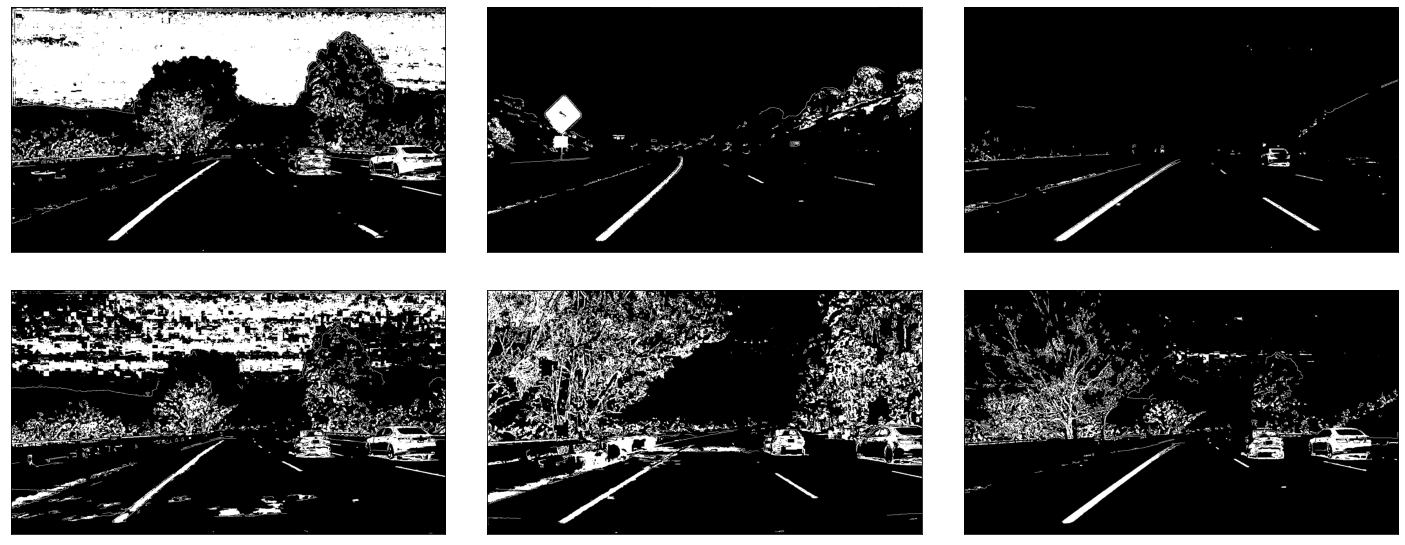

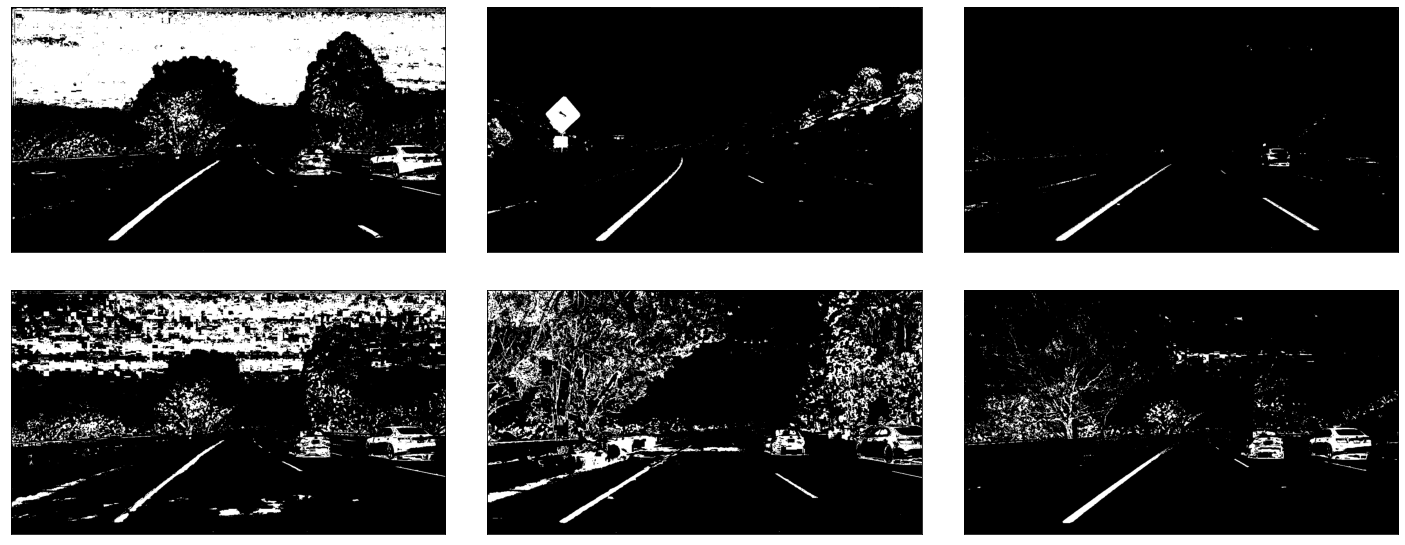

In [ ]:
canny_sthreshs = [gray * 0 for gray in grays]
for i in range(6):
    canny_sthreshs[i][(Sthresholds[i] == 1) | (cannys[i] == 1)] = 1
show_six(canny_sthreshs)
show_six(Sthresholds)

# Preview

In [8]:
def rescaleFrame(frame, scale = 0.75):
    height = int(frame.shape[0] * scale)
    width = int(frame.shape[1] * scale)

    return cv.resize(frame, (width, height), interpolation=cv.INTER_AREA)

In [105]:
cv.imshow("IMG", cv.cvtColor(cv.imread("Project_data/test_images/straight_lines2.jpg"), cv.COLOR_BGR2HLS)[:,:,2])
cv.waitKey(0)
cv.destroyAllWindows()

In [23]:
capture = cv.VideoCapture("Project_data/project_video.mp4")
time.sleep(2)

while(True):
    ret, frame = capture.read()

    wider_frame = frame * 0

    
    S = cv.cvtColor(frame, cv.COLOR_BGR2HLS)[:,:,2]
    sthresh = S_thresholder(S, (120, 255))


    frame = rescaleFrame(frame, 0.5)
    S = rescaleFrame(S, 0.5)
    sthresh = rescaleFrame(sthresh, 0.5)
    
    wider_frame[0:wider_frame[0]]
    # cv.imshow("Video", sthresh)

    if cv.waitKey(16.6) & 0xFF == ord('q'):
        break

capture.release()
cv.destroyAllWindows()

TypeError: only integer scalar arrays can be converted to a scalar index